In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Посмотрим на наши данные

In [ ]:
df = pd.read_csv('/content/Second_week_second_dataset (1).csv', index_col = 'Unnamed: 0')

df.head()

,X,Y
0,5.432943,0.109422
1,-9.101988,7.139412
2,1.402974,0.376474
3,5.578543,0.229852
4,1.392159,8.419821


Изобразим визуально

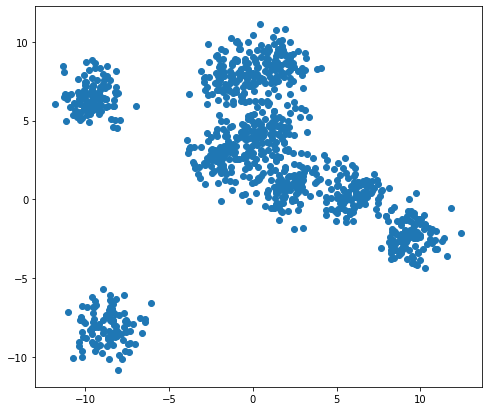

In [ ]:
plt.figure(figsize = (8, 7))
plt.scatter(df['X'], df['Y'])
plt.show()

На глаз представляется 3 кластера, однако попробуем определить оптимальное кол-во кластеров с помощью метода локтя

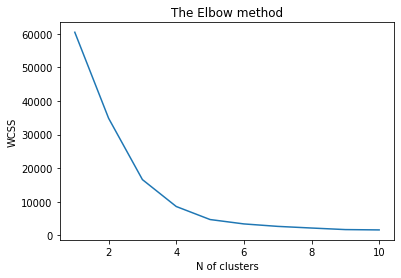

In [ ]:
X = df.values

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title ('The Elbow method')
plt.xlabel('N of clusters')
plt.ylabel('WCSS')
plt.show()



А также с помошью Силуэта

In [ ]:
km_silhouette = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  preds = kmeans.predict(X)

  silhouette = silhouette_score(X, preds)
  km_silhouette.append(silhouette)

  print('Silhouette score for ' + str(i) + ' clusters' + str(silhouette))
  print('=============================')

Silhouette score for 2 clusters0.5227841181449546
Silhouette score for 3 clusters0.5268457921644195
Silhouette score for 4 clusters0.5881736416677724
Silhouette score for 5 clusters0.5850147201027248
Silhouette score for 6 clusters0.5628465884021894
Silhouette score for 7 clusters0.5680517439860818
Silhouette score for 8 clusters0.5616060406815108
Silhouette score for 9 clusters0.5684695253389229
Silhouette score for 10 clusters0.5441488891210733


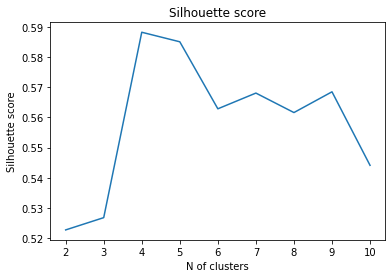

In [ ]:
plt.plot(range(2, 11), km_silhouette)
plt.title ('Silhouette score')
plt.xlabel('N of clusters')
plt.ylabel('Silhouette score')
plt.show()

Метод локтя показывает оптимальное кол-во кластеров 4 или 5, т.к. после 4 и 5 WCSS падает не сильно, однако пик скора Силуэтта приходится на 4 кластера, след-но кластеризуем по 4 кластерам 

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Теперь визуализируем кластеризацию

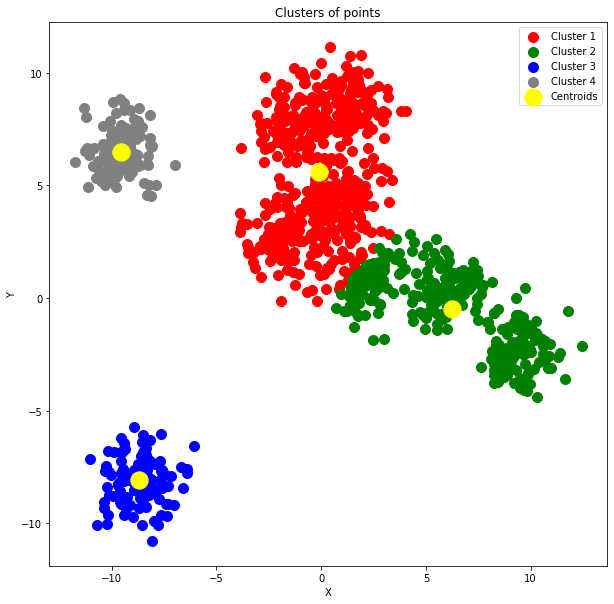

In [ ]:
plt.figure(figsize = (10, 10))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'gray', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()